<a href="https://colab.research.google.com/github/mittyone/JSCCR-fStageII/blob/main/Cox%2C_Kaplan_%2C_JSCCRfStageII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lifelines


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 11.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=ad5ee0f70ead7b0d03aad70fef2a280b5fc38614ed5456cef24a56dfd1e1c53c
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
import pandas as pd
from lifelines import CoxPHFitter

df = pd.read_excel('JSCCR fStageII pathology.xlsx')

In [ ]:
# 'pDepth' と 'ly' のダミー変数を作成
df_dummies = pd.get_dummies(df, columns=['pDepth', 'ly','v', 'CEA', 'LN number', 'Pathology'], drop_first=True)

# Cox比例ハザードモデルの適用
cph = CoxPHFitter()
cph.fit(df_dummies, duration_col='DFS', event_col='Event')
result = cph.summary

# 結果の表示
print(result)

                 coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                    
pDepth_2     0.169755   1.185015  0.054528        0.062883        0.276627   
pDepth_3     0.077813   1.080921  0.100807       -0.119764        0.275391   
ly_2        -0.024799   0.975506  0.043447       -0.109954        0.060357   
ly_3         0.007352   1.007380  0.078800       -0.147093        0.161798   
ly_4        -0.041709   0.959149  0.205047       -0.443595        0.360177   
v_2          0.031243   1.031736  0.046229       -0.059363        0.121850   
v_3          0.079953   1.083236  0.064401       -0.046271        0.206176   
v_4          0.182733   1.200493  0.111044       -0.034909        0.400374   
CEA_2        0.061638   1.063577  0.045678       -0.027890        0.151165   
CEA_3        0.119627   1.127076  0.071683       -0.020870        0.260123   
LN number_2  0.098605   1.103630  0.044456        0.011473      

In [ ]:
# Cox比例ハザードモデルの適用
cph = CoxPHFitter()
cph.fit(df_dummies, duration_col='DFS', event_col='Event')
result = cph.summary

# 結果をExcelファイルに出力
result.to_excel('cox_model_multivariate_analysis_results.xlsx')


In [ ]:
import numpy as np

# Cox比例ハザードモデルの初期化
cph = CoxPHFitter()

# 結果を格納するための空のデータフレーム
summary_df = pd.DataFrame()

# 変数のリスト
variables = ['pDepth', 'ly', 'v', 'CEA', 'LN number', 'Pathology']

# 全てのカテゴリカル変数のダミー変数を作成
df_dummy = pd.get_dummies(df, columns=variables, drop_first=True)

# 単変量解析の実行
for var in df_dummy.columns.drop(['DFS', 'Event']):
    cph.fit(df_dummy[['DFS', 'Event', var]], 'DFS', event_col='Event')
    # 結果の抽出
    coef = cph.summary.loc[var, 'coef']
    coef_lower_95 = cph.summary.loc[var, 'coef lower 95%']
    coef_upper_95 = cph.summary.loc[var, 'coef upper 95%']
    row = cph.summary.loc[var, ['exp(coef)', 'p']]
    row['exp(coef) lower 95%'] = np.exp(coef_lower_95)
    row['exp(coef) upper 95%'] = np.exp(coef_upper_95)
    row.name = var
    summary_df = summary_df.append(row)

# 要約表の表示
print(summary_df)


<ipython-input-5-552a4dad2553>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(row)
<ipython-input-5-552a4dad2553>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(row)
<ipython-input-5-552a4dad2553>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(row)
<ipython-input-5-552a4dad2553>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(row)
<ipython-input-5-552a4dad2553>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summar

             exp(coef)         p  exp(coef) lower 95%  exp(coef) upper 95%
pDepth_2      1.190938  0.001127             1.072054             1.323004
pDepth_3      1.062138  0.541881             0.875096             1.289158
ly_2          0.977319  0.568041             0.903303             1.057401
ly_3          1.080814  0.281300             0.938323             1.244943
ly_4          1.031575  0.877104             0.695648             1.529720
v_2           0.992092  0.843955             0.916686             1.073701
v_3           1.067204  0.250117             0.955229             1.192306
v_4           1.163350  0.152320             0.945659             1.431153
CEA_2         1.051592  0.258128             0.963788             1.147395
CEA_3         1.110405  0.133403             0.968469             1.273143
LN number_2   1.094782  0.039965             1.004159             1.193583
Pathology_2   1.017734  0.662626             0.940455             1.101364
Pathology_3   1.004370  0

<ipython-input-5-552a4dad2553>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(row)
<ipython-input-5-552a4dad2553>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(row)


In [ ]:
summary_df.to_excel('cox_model_univariate_analysis.xlsx')

In [ ]:
import pandas as pd
from lifelines import CoxPHFitter

df = pd.read_excel('JSCCR fStageII all var.xlsx')

In [ ]:
print(df.columns)

Index(['gender', 'age', 'Approach', 'operation', 'LN dissection', 'Pathology',
       'pDepth', 'ly', 'v', 'CEA', 'LN number', 'Location', 'Obstruction',
       'Event', 'DFS'],
      dtype='object')


In [ ]:
import numpy as np

# Cox比例ハザードモデルの初期化
cph = CoxPHFitter()

# 結果を格納するための空のデータフレーム
summary_df = pd.DataFrame()

# 変数のリスト
variables = ['gender', 'age', 'Approach', 'operation', 'LN dissection', 'Location',
       'Obstruction', 'Pathology', 'pDepth', 'ly', 'v', 'CEA', 'LN number']

# 全てのカテゴリカル変数のダミー変数を作成
df_dummy = pd.get_dummies(df, columns=variables, drop_first=True)

# 単変量解析の実行
for var in df_dummy.columns.drop(['DFS', 'Event']):
    cph.fit(df_dummy[['DFS', 'Event', var]], 'DFS', event_col='Event')
    # 結果の抽出
    coef = cph.summary.loc[var, 'coef']
    coef_lower_95 = cph.summary.loc[var, 'coef lower 95%']
    coef_upper_95 = cph.summary.loc[var, 'coef upper 95%']
    row = cph.summary.loc[var, ['exp(coef)', 'p']]
    row['exp(coef) lower 95%'] = np.exp(coef_lower_95)
    row['exp(coef) upper 95%'] = np.exp(coef_upper_95)
    row.name = var
    summary_df = summary_df.append(row)

# 要約表の表示
print(summary_df)


<ipython-input-4-a3c2200fd531>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(row)
<ipython-input-4-a3c2200fd531>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(row)
<ipython-input-4-a3c2200fd531>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(row)
<ipython-input-4-a3c2200fd531>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(row)
<ipython-input-4-a3c2200fd531>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summar

                 exp(coef)             p  exp(coef) lower 95%  \
gender_2          0.976044  5.473167e-01             0.901930   
age_2             0.987853  7.700913e-01             0.910116   
age_3             1.514021  1.350018e-16             1.372260   
Approach_2        1.072592  1.775611e-01             0.968709   
Approach_99       0.839857  7.613950e-02             0.692538   
operation_2       1.023496  7.474731e-01             0.888563   
operation_3       1.008175  8.531294e-01             0.924917   
operation_4       1.013338  8.640812e-01             0.870706   
operation_5       0.972121  5.191207e-01             0.892050   
operation_6       1.470576  6.422210e-03             1.114396   
operation_7       0.931532  2.279552e-01             0.830088   
LN dissection_2   1.168550  2.171521e-04             1.075958   
LN dissection_3   0.847339  4.513771e-05             0.782515   
Location_2        0.969222  4.365118e-01             0.895828   
Obstruction_2     0.99707

<ipython-input-4-a3c2200fd531>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(row)


In [ ]:
summary_df.to_excel('cox_model_univariate_analysis_all var.xlsx')

In [ ]:
import pandas as pd
from lifelines import CoxPHFitter

df = pd.read_excel('JSCCR fStageII all var.xlsx')

In [ ]:
import pandas as pd
from lifelines import CoxPHFitter

# データフレーム 'df' が既に存在すると仮定しています。
# 必要なカラムだけを選択します
df_selected = df[['age', 'pDepth', 'LN number', 'DFS', 'Event']]

# 'age', 'pDepth', 'LN number' はカテゴリ変数なのでダミー変数に変換します
df_dummies = pd.get_dummies(df_selected, columns=['age', 'pDepth', 'LN number'], drop_first=True)

# Cox比例ハザードモデルの適用
cph = CoxPHFitter()
cph.fit(df_dummies, duration_col='DFS', event_col='Event')
result = cph.summary

# 結果の表示
print(result)


                 coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                    
age_2        0.106897   1.112820  0.045216        0.018275        0.195519   
age_3        0.450132   1.568519  0.054436        0.343439        0.556824   
pDepth_2     0.158056   1.171232  0.053984        0.052250        0.263863   
pDepth_3     0.066942   1.069234  0.099767       -0.128598        0.262483   
LN number_2  0.071316   1.073921  0.044338       -0.015585        0.158218   

             exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                                 
age_2                   1.018443             1.215942     0.0  2.364136   
age_3                   1.409788             1.745122     0.0  8.269006   
pDepth_2                1.053639             1.301949     0.0  2.927842   
pDepth_3                0.879327             1.300154     0.0  0.670984   
LN 

In [ ]:
# 結果をExcelファイルに出力
result.to_excel('cox_model_selective_multivariate.xlsx')


In [ ]:
import pandas as pd

df = pd.read_excel('JSCCR fStageII all var.xlsx')

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# 仮定：dfはあなたのデータフレームで、'age', 'LN_number'という列が存在します。

# ageが1,2のデータを抽出
df_age_12 = df[df['age'].isin([1, 2])]

# ageが1,3のデータを抽出
df_age_13 = df[df['age'].isin([1, 3])]

# ageが1,2のときのLN_numberのカイ二乗検定
contingency_table_12 = pd.crosstab(df_age_12['age'], df_age_12['LN number'])
print("Contingency table for age 1,2:\n", contingency_table_12)
chi2, p, dof, ex = chi2_contingency(contingency_table_12)
print(f"age 1,2: chi2 = {chi2}, p = {p}")

# ageが1,3のときのLN_numberのカイ二乗検定
contingency_table_13 = pd.crosstab(df_age_13['age'], df_age_13['LN number'])
print("Contingency table for age 1,3:\n", contingency_table_13)
chi2, p, dof, ex = chi2_contingency(contingency_table_13)
print(f"age 1,3: chi2 = {chi2}, p = {p}")


Contingency table for age 1,2:
 LN number    1    2
age                
1          810  274
2          623  272
age 1,2: chi2 = 6.165046981599289, p = 0.013029891292197067
Contingency table for age 1,3:
 LN number    1    2
age                
1          810  274
3          317  183
age 1,3: chi2 = 20.824487047586395, p = 5.033527137413917e-06


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# 仮定：dfはあなたのデータフレームで、'age', 'LN_number'という列が存在します。

# ageが1,2のデータを抽出
df_age_12 = df[df['age'].isin([1, 2])]

# ageが1,3のデータを抽出
df_age_13 = df[df['age'].isin([1, 3])]

# ageが1,2のときのLN_numberのカイ二乗検定
contingency_table_12 = pd.crosstab(df_age_12['age'], df_age_12['LN dissection'])
print("Contingency table for age 1,2:\n", contingency_table_12)
chi2, p, dof, ex = chi2_contingency(contingency_table_12)
print(f"age 1,2: chi2 = {chi2}, p = {p}")

# ageが1,3のときのLN_numberのカイ二乗検定
contingency_table_13 = pd.crosstab(df_age_13['age'], df_age_13['LN dissection'])
print("Contingency table for age 1,3:\n", contingency_table_13)
chi2, p, dof, ex = chi2_contingency(contingency_table_13)
print(f"age 1,3: chi2 = {chi2}, p = {p}")

Contingency table for age 1,2:
 LN dissection   1    2    3
age                        
1              62  314  708
2              72  316  507
age 1,2: chi2 = 16.101300886114206, p = 0.0003188944323387938
Contingency table for age 1,3:
 LN dissection   1    2    3
age                        
1              62  314  708
3              59  238  203
age 1,3: chi2 = 86.98906844716419, p = 1.2899230214581102e-19


In [ ]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

# データの読み込み
df = pd.read_excel('JSCCR fStageII all var.xlsx')

# pDepthのカテゴリを設定
df['pDepth_category'] = df['pDepth'].map({1: 'SS', 2: 'SE', 3: 'SI'})

# lyのカテゴリを設定
df['v_category'] = df['v'].map({1: 'v0', 2: 'v1', 3: 'v2', 4: 'v3'})

# LN numberのカテゴリを設定
df['LN_number_category'] = df['LN number'].map({1: '0~11', 2: '12<'})

# ageのカテゴリを設定
df['age_category'] = df['age'].map({1: '-70', 2: '71-79', 3:'80-'})

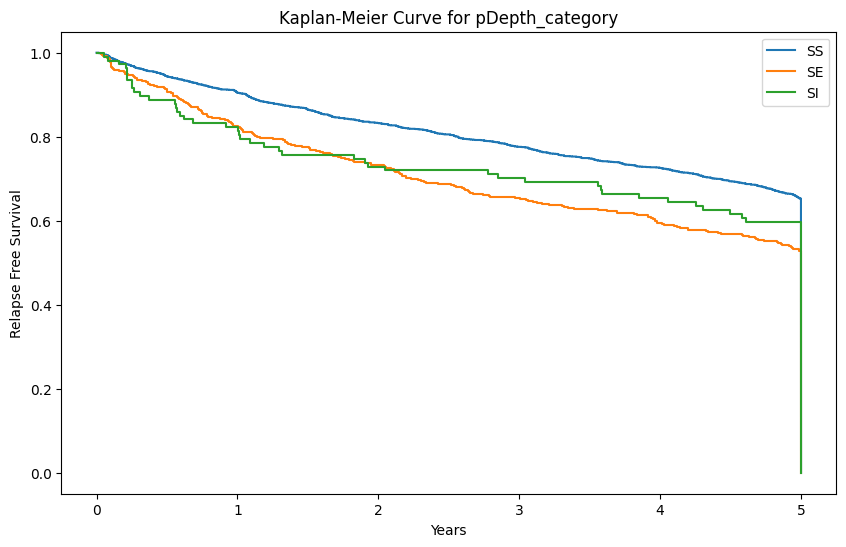

Log-rank test between SS and SE in pDepth_category: p = 0.0000
Log-rank test between SS and SI in pDepth_category: p = 0.1270
Log-rank test between SE and SI in pDepth_category: p = 0.2763


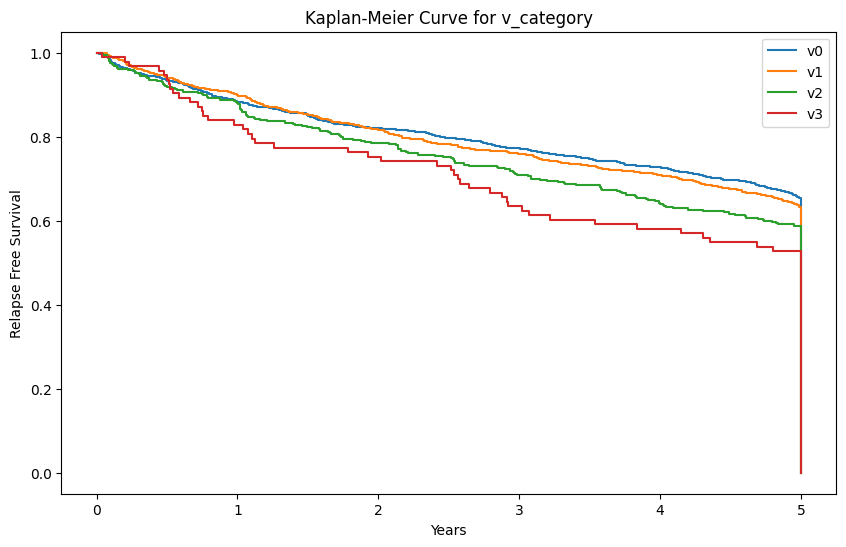

Log-rank test between v0 and v1 in v_category: p = 0.3220
Log-rank test between v0 and v2 in v_category: p = 0.0229
Log-rank test between v0 and v3 in v_category: p = 0.0084
Log-rank test between v1 and v2 in v_category: p = 0.1060
Log-rank test between v1 and v3 in v_category: p = 0.0254
Log-rank test between v2 and v3 in v_category: p = 0.2528


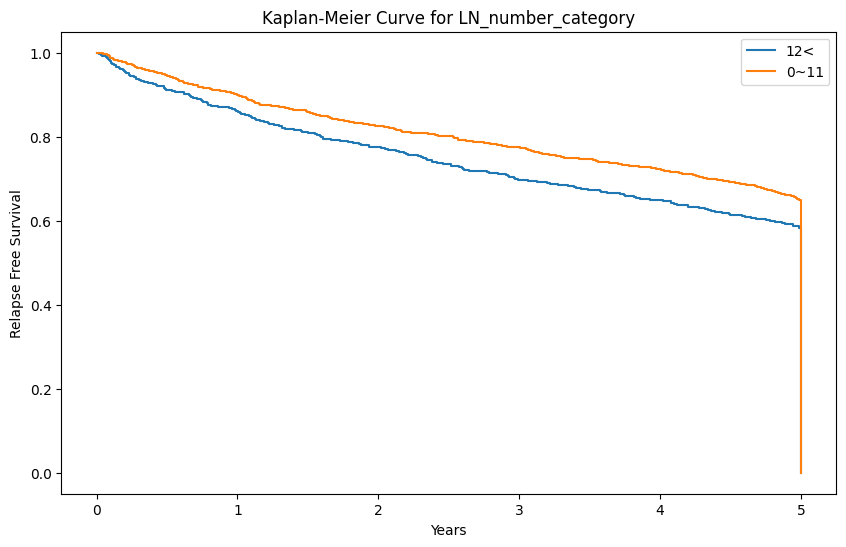

Log-rank test between 12< and 0~11 in LN_number_category: p = 0.0008


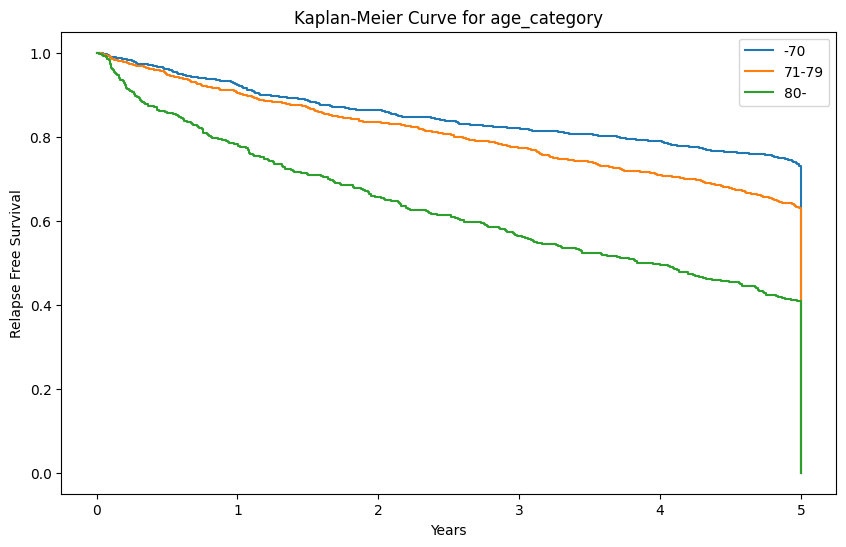

Log-rank test between -70 and 71-79 in age_category: p = 0.0000
Log-rank test between -70 and 80- in age_category: p = 0.0000
Log-rank test between 71-79 and 80- in age_category: p = 0.0000


In [ ]:
def plot_kaplan_meier(df, column):
    kmf = KaplanMeierFitter()
    plt.figure(figsize=(10, 6))

    for value in df[column].unique():
        mask = df[column] == value
        kmf.fit(df['DFS'][mask], df['Event'][mask], label=value)
        kmf.plot(ci_show=False)

    plt.title(f"Kaplan-Meier Curve for {column}")
    plt.xlabel("Years")
    plt.ylabel("Relapse Free Survival")
    plt.legend()
    plt.show()

def logrank_test_by_group(df, column):
    groups = df[column].unique()
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            group1 = df[df[column] == groups[i]]
            group2 = df[df[column] == groups[j]]
            results = logrank_test(group1['DFS'], group2['DFS'], event_observed_A=group1['Event'], event_observed_B=group2['Event'])
            print(f"Log-rank test between {groups[i]} and {groups[j]} in {column}: p = {results.p_value:.4f}")

# pDepth_categoryに対するKaplan-Meier曲線とLog-rank test
plot_kaplan_meier(df, 'pDepth_category')
logrank_test_by_group(df, 'pDepth_category')

# ly_categoryに対するKaplan-Meier曲線とLog-rank test
plot_kaplan_meier(df, 'v_category')
logrank_test_by_group(df, 'v_category')

# LN_number_categoryに対するKaplan-Meier曲線とLog-rank test
plot_kaplan_meier(df, 'LN_number_category')
logrank_test_by_group(df, 'LN_number_category')

# age_categoryに対するKaplan-Meier曲線とLog-rank test
plot_kaplan_meier(df, 'age_category')
logrank_test_by_group(df, 'age_category')